In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('LeagueTable.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Pos                          20 non-null     int64 
 1   Team                         20 non-null     object
 2   Pld                          20 non-null     int64 
 3   W                            20 non-null     int64 
 4   D                            20 non-null     int64 
 5   L                            20 non-null     int64 
 6   GF                           20 non-null     int64 
 7   GA                           20 non-null     int64 
 8   GD                           20 non-null     object
 9   Pts                          20 non-null     object
 10  Qualification or relegation  10 non-null     object
dtypes: int64(7), object(4)
memory usage: 1.8+ KB


In [11]:
df.head()

,Pos,Team,Pld,W,D,L,GF,GA,GD,Pts,Qualification or relegation
0,1,Manchester City (C),38,28,7,3,96,34,+62,91,Qualification for the Champions League league ...
1,2,Arsenal,38,28,5,5,91,29,+62,89,Qualification for the Champions League league ...
2,3,Liverpool,38,24,10,4,86,41,+45,82,Qualification for the Champions League league ...
3,4,Aston Villa,38,20,8,10,76,61,+15,68,Qualification for the Champions League league ...
4,5,Tottenham Hotspur,38,20,6,12,74,61,+13,66,Qualification for the Europa League league phase


In [14]:
df['GD'] = df['GD'].str.replace('−', '-', regex= False)
df['GD'] = df['GD'].astype(int)

In [19]:
df['Pts'] = df['Pts'].str.replace('40[c]', '40', regex= False)
df['Pts'] = df['Pts'].str.replace('32[d]', '32', regex= False)

In [25]:
df["Qualification or relegation"] = df["Qualification or relegation"].fillna("No qualification")

In [30]:
df['Win Rate'] = (df['W'] / df['Pld']) * 100
df['Draw Rate'] = (df['D'] / df['Pld']) * 100
df['Loss Rate'] = (df['L'] / df['Pld']) * 100
df['Mean GF'] = df['GF'] / df['Pld']
df['Mean GD'] = df['GA'] / df['Pld']
df['Attack Ratio'] = df['GF'] / df['GA']

In [48]:
_Pts = df.sort_values(by= 'Pts', ascending= False).head()['Team']
Max_GF = df.sort_values(by= 'GF', ascending= False).head()['Team']
Min_GF = df.sort_values(by= 'GA').head()['Team']
Max_GD = df.sort_values(by= 'GD', ascending= False).head()['Team']
Max_Win_Rate = df.sort_values(by= 'Win Rate', ascending= False).head()['Team']

In [57]:
print(f'--> Teams with the highest points \n{_Pts}\n')
print(f'--> Teams that scored the most goals \n{Max_GF}\n')
print(f'--> The best defense \n{Min_GF}\n')
print(f'--> Highest goal difference \n{Max_GD}\n')
print(f'--> High win percentage \n{Max_Win_Rate}\n')

--> Teams with the highest points 
0    Manchester City (C)
1                Arsenal
2              Liverpool
3            Aston Villa
4      Tottenham Hotspur
Name: Team, dtype: object

--> Teams that scored the most goals 
0    Manchester City (C)
1                Arsenal
2              Liverpool
6       Newcastle United
5                Chelsea
Name: Team, dtype: object

--> The best defense 
1                 Arsenal
0     Manchester City (C)
2               Liverpool
14                Everton
7       Manchester United
Name: Team, dtype: object

--> Highest goal difference 
0    Manchester City (C)
1                Arsenal
2              Liverpool
6       Newcastle United
3            Aston Villa
Name: Team, dtype: object

--> High win percentage 
0    Manchester City (C)
1                Arsenal
2              Liverpool
3            Aston Villa
4      Tottenham Hotspur
Name: Team, dtype: object



In [59]:
plt.rcParams["figure.figsize"] = (10, 6)
plt.style.use("ggplot")

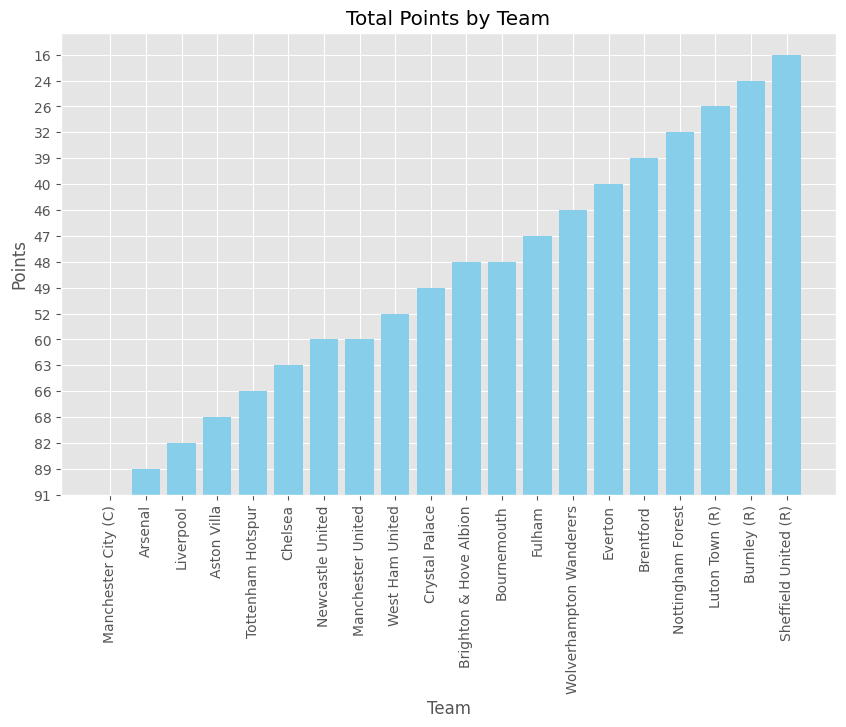

In [60]:
fig1, ax1 = plt.subplots()
ax1.bar(df["Team"], df["Pts"], color="skyblue")
ax1.set_title("Total Points by Team")
ax1.set_xlabel("Team")
ax1.set_ylabel("Points")
ax1.tick_params(axis='x', rotation=90)

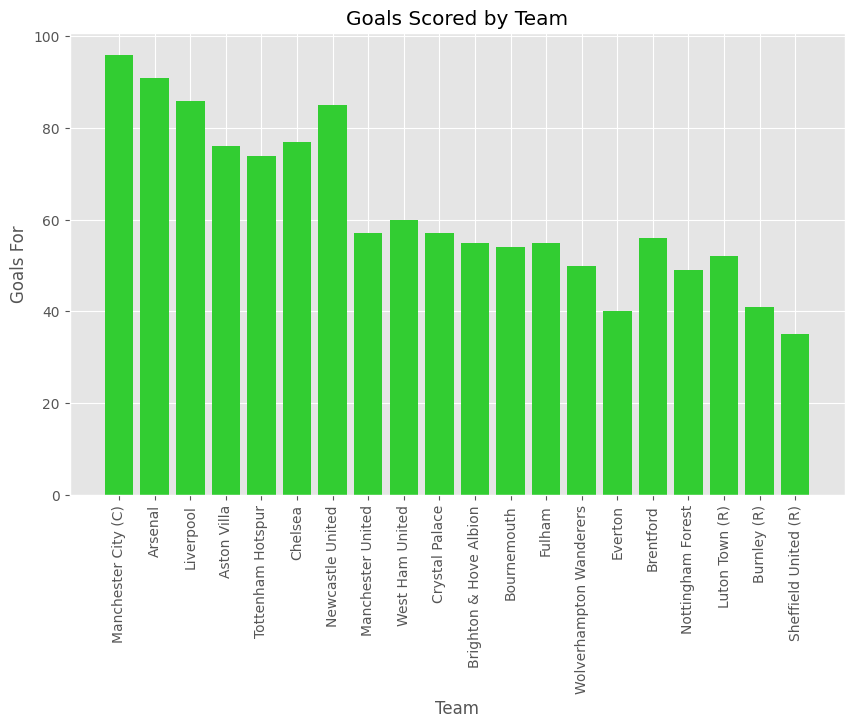

In [61]:
fig2, ax2 = plt.subplots()
ax2.bar(df["Team"], df["GF"], color="limegreen")
ax2.set_title("Goals Scored by Team")
ax2.set_xlabel("Team")
ax2.set_ylabel("Goals For")
ax2.tick_params(axis='x', rotation=90)

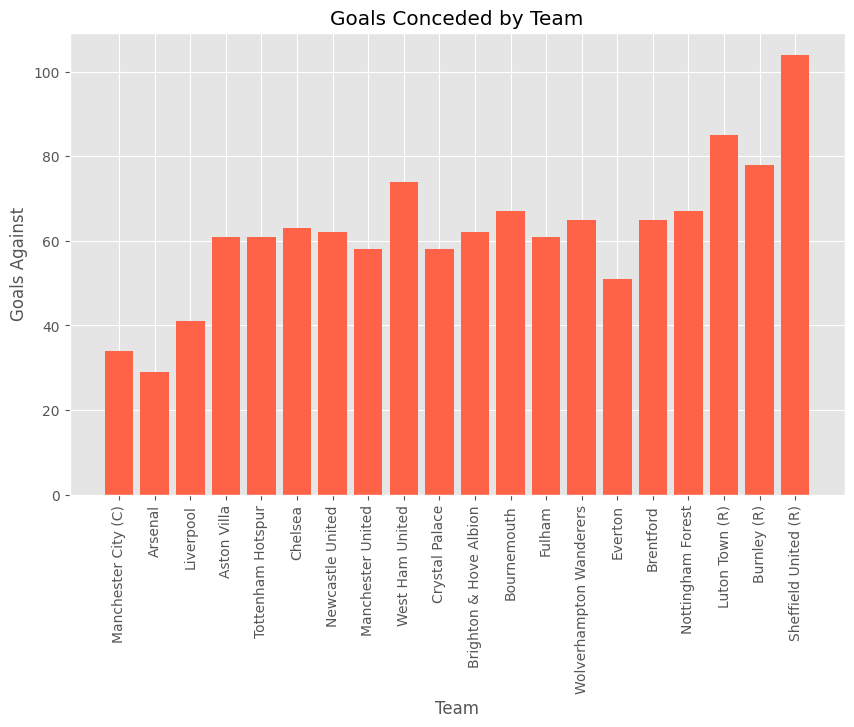

In [62]:
fig3, ax3 = plt.subplots()
ax3.bar(df["Team"], df["GA"], color="tomato")
ax3.set_title("Goals Conceded by Team")
ax3.set_xlabel("Team")
ax3.set_ylabel("Goals Against")
ax3.tick_params(axis='x', rotation=90)

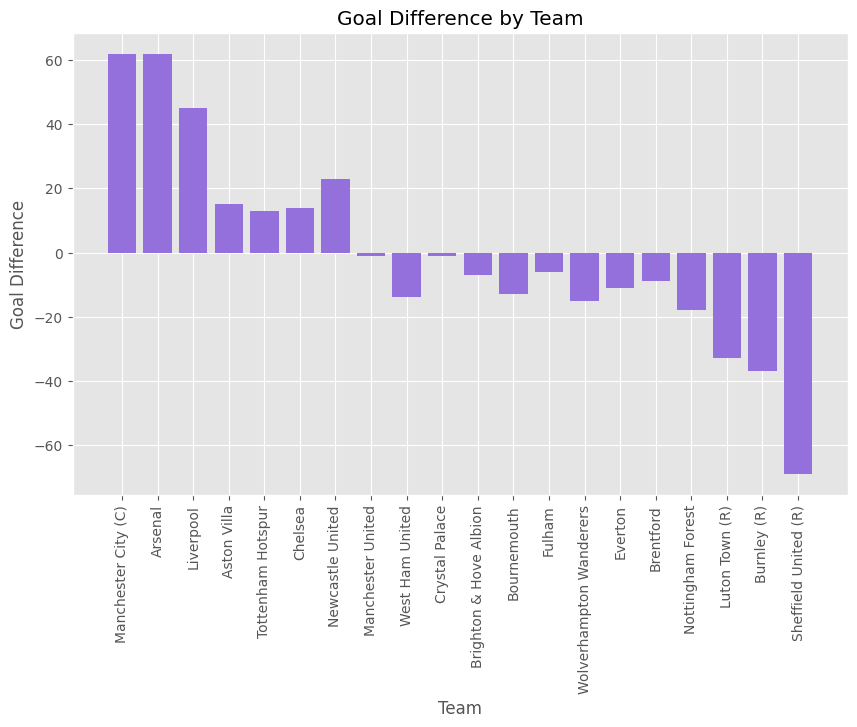

In [63]:
fig4, ax4 = plt.subplots()
ax4.bar(df["Team"], df["GD"], color="mediumpurple")
ax4.set_title("Goal Difference by Team")
ax4.set_xlabel("Team")
ax4.set_ylabel("Goal Difference")
ax4.tick_params(axis='x', rotation=90)

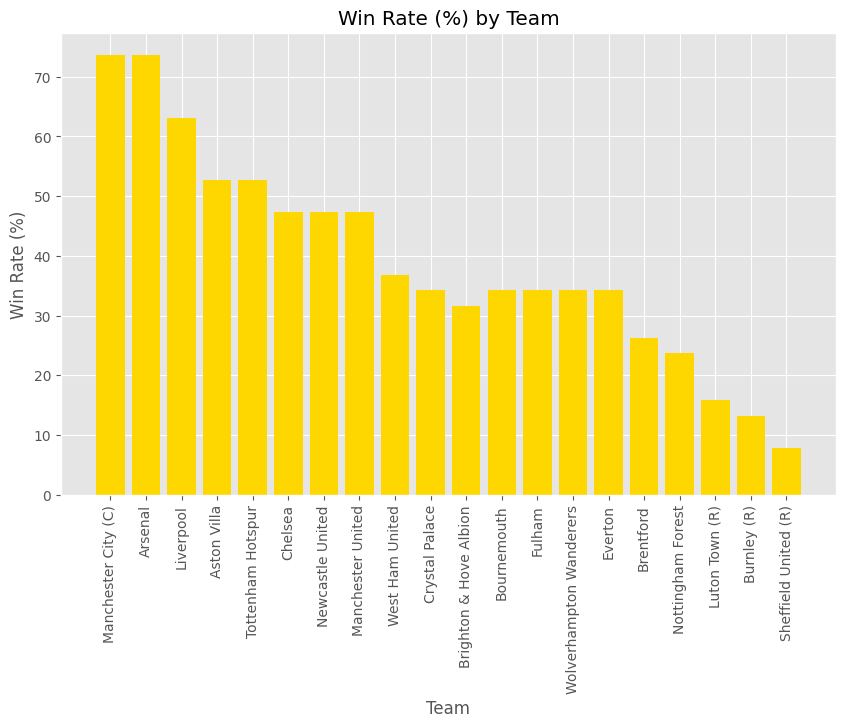

In [64]:
fig5, ax5 = plt.subplots()
ax5.bar(df["Team"], df["Win Rate"], color="gold")
ax5.set_title("Win Rate (%) by Team")
ax5.set_xlabel("Team")
ax5.set_ylabel("Win Rate (%)")
ax5.tick_params(axis='x', rotation=90)

Text(0.5, 1.0, 'Share of Total Goals Scored')

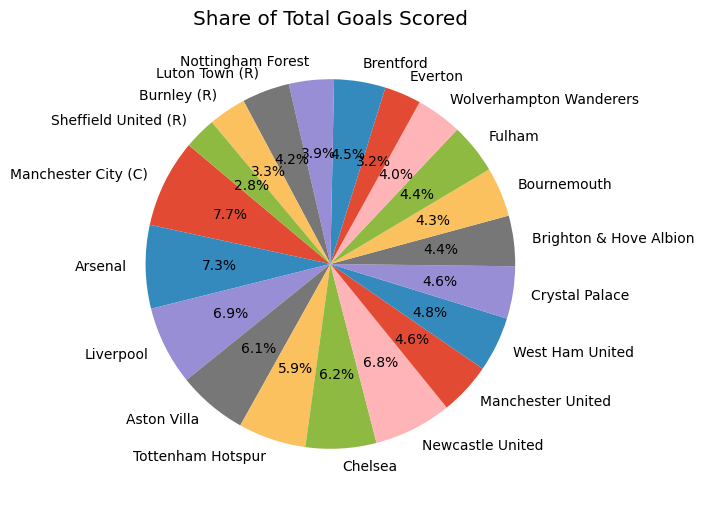

In [65]:
fig6, ax6 = plt.subplots()
ax6.pie(df["GF"], labels=df["Team"], autopct="%1.1f%%", startangle=140)
ax6.set_title("Share of Total Goals Scored")

Text(0, 0.5, 'Points')

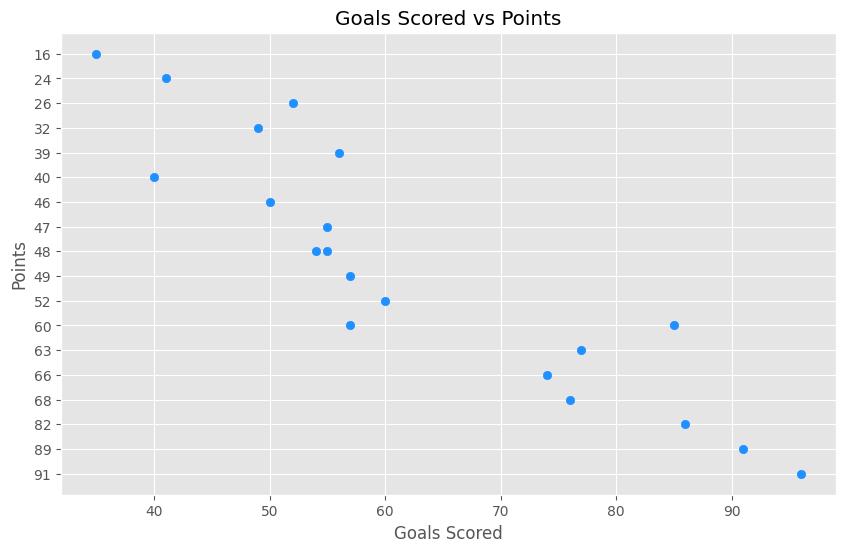

In [66]:
fig7, ax7 = plt.subplots()
ax7.scatter(df["GF"], df["Pts"], color="dodgerblue")
ax7.set_title("Goals Scored vs Points")
ax7.set_xlabel("Goals Scored")
ax7.set_ylabel("Points")

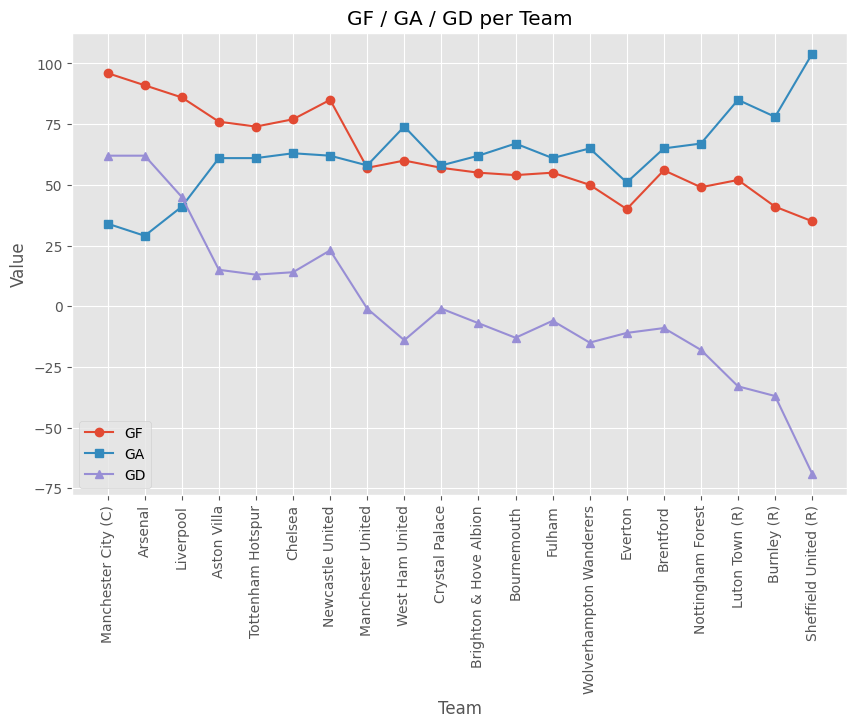

In [67]:
fig8, ax8 = plt.subplots()
ax8.plot(df["Team"], df["GF"], label="GF", marker="o")
ax8.plot(df["Team"], df["GA"], label="GA", marker="s")
ax8.plot(df["Team"], df["GD"], label="GD", marker="^")
ax8.set_title("GF / GA / GD per Team")
ax8.set_xlabel("Team")
ax8.set_ylabel("Value")
ax8.legend()
ax8.tick_params(axis='x', rotation=90)